# Clustering : Facebook Sellers in Thailand

## ML Model used: K-Means Clustering

## Importing Libraries

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

Dataset Link: https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand

In [281]:
data = pd.read_csv(r"C:\Users\srish\ml girly\Facebook Sellers Thailand Dataset\Live_20210128.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [283]:
data.shape

(7050, 16)

## Data Pre-processing

In [286]:
data.duplicated().sum()
#no duplicate records

0

In [288]:
data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

There are no missing values other than 4 redundant columns. Thus, no imputation/removal of records is required. We simply remove the null columns.

In [291]:
data.drop(["Column1","Column2","Column3","Column4"],axis = 1, inplace = True)

In [293]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [297]:
data.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Looking at some individual features

In [300]:
len(data['status_id'].unique())

7050

Status ID seems to be a key for the record; it is unique for every row and thus cannot be used for clustering as it does not give any similarity information about the sellers themselves.

In [303]:
len(data['status_published'].unique())

6913

Status Published is the time and date when a particular seller published their marketplace post. Most of the values in this column are unique. We drop these two columns for our purposes.

In [306]:
data.drop(["status_id","status_published"],axis = 1, inplace = True)

In [308]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [310]:
len(data['status_type'].unique())

4

In [312]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Thus, Status Type is a categorical variable with 4 levels: video, photo, link, status. We convert this categorical variable into numerical using One-Hot Encoding for our purposes.

In [315]:
from sklearn.preprocessing import OneHotEncoder

In [317]:
ohe = OneHotEncoder(sparse_output = False)
encoded = ohe.fit_transform(data[['status_type']])
encoded_cols = ohe.get_feature_names_out(['status_type'])

In [319]:
encoded_df = pd.DataFrame(encoded, columns = encoded_cols, index = data.index)
data = pd.concat([data, encoded_df], axis = 1).drop(columns = ['status_type'])
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0.0,0.0,0.0,1.0
1,150,0,0,150,0,0,0,0,0,0.0,1.0,0.0,0.0
2,227,236,57,204,21,1,1,0,0,0.0,0.0,0.0,1.0
3,111,0,0,111,0,0,0,0,0,0.0,1.0,0.0,0.0
4,213,0,0,204,9,0,0,0,0,0.0,1.0,0.0,0.0


We drop one of the columns created via the encoding to avoid multicollinearity.

In [322]:
data.drop("status_type_link",axis = 1, inplace = True)
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0.0,0.0,1.0
1,150,0,0,150,0,0,0,0,0,1.0,0.0,0.0
2,227,236,57,204,21,1,1,0,0,0.0,0.0,1.0
3,111,0,0,111,0,0,0,0,0,1.0,0.0,0.0
4,213,0,0,204,9,0,0,0,0,1.0,0.0,0.0


In [324]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,0.608227,0.051773,0.331064
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000


### Feature Scaling

In [327]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
col = data.columns
X = pd.DataFrame(ms.fit_transform(data), columns = [col])
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0


##  K-Means model

In [330]:
from sklearn.cluster import KMeans

In [332]:
kmeans2 = KMeans(n_clusters=2, random_state=44, n_init = 50) 
kmeans2.fit(X)

KMeans(n_clusters=2, n_init=50, random_state=44)

In [333]:
kmeans2.inertia_
#inertia is the total within cluster sum of squares: which we seek to minimise to maximise homogenity within our clusters

874.308326542843

In [334]:
kmeans3 = KMeans(n_clusters=3, random_state=44, n_init = 50) 
kmeans3.fit(X)

KMeans(n_clusters=3, n_init=50, random_state=44)

In [335]:
kmeans3.inertia_
#we see that the inertia has dropped dramatically, indicating there are likely more than 2 natural clusters in our dataset.

246.95671693648123

In [338]:
kmeans4 = KMeans(n_clusters=4, random_state=44, n_init = 50) 
kmeans4.fit(X)

KMeans(n_clusters=4, n_init=50, random_state=44)

In [339]:
kmeans4.inertia_

186.59288875560335

In [340]:
kmeans5 = KMeans(n_clusters=5, random_state=44, n_init = 50) 
kmeans5.fit(X)

KMeans(n_clusters=5, n_init=50, random_state=44)

In [347]:
kmeans5.inertia_ 

132.85505115582527

the inertia does not drop too much, indicating that we likely require <5 clusters.

In [350]:
kmeans6 = KMeans(n_clusters=6, random_state=44, n_init = 50) 
kmeans6.fit(X)

KMeans(n_clusters=6, n_init=50, random_state=44)

In [351]:
kmeans6.inertia_

95.65928366967529

### Elbow Graph 
The elbow graph is a graph of the inertia of our kmeans model wrt 'k'. A kink in the graph indicates at which k the inertia is dropping.

In [372]:
wcss = [] #within cluster sum of squares

for i in range(1,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=44)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [374]:
wcss

[3790.8918238930955,
 921.288107708884,
 246.9567169364812,
 193.20402291090312,
 156.0082918811071]

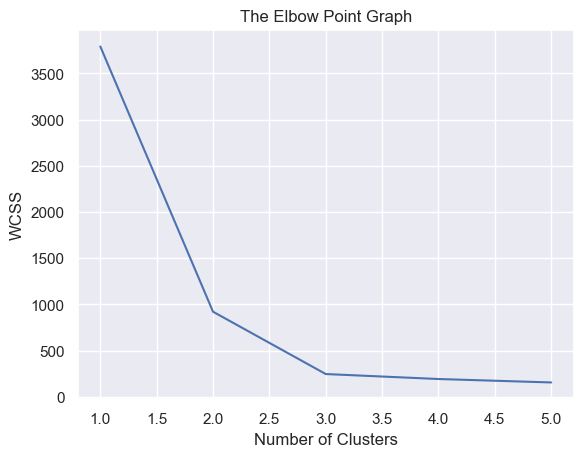

In [376]:
sns.set()
plt.plot(range(1,6), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow graph has a kink at k = 2 and k = 3, indicating that the optimum number of clusters is likely 3.

## Visualising Clusters

Since we have high dimensional data, a 2D projection would require looking at pairs of our features.

In [452]:
Y = kmeans3.fit_predict(X)

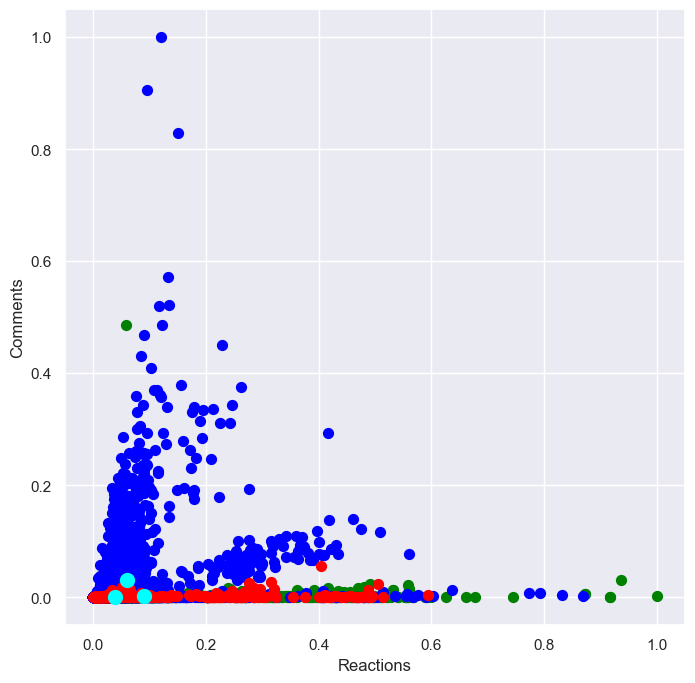

In [454]:
plt.figure(figsize=(8,8))
#plotting each cluster in separate colours
plt.scatter(X[Y==0].iloc[:,0], X[Y==0].iloc[:,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1].iloc[:,0], X[Y==1].iloc[:,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2].iloc[:,0], X[Y==2].iloc[:,1], s=50, c='red', label='Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.xlabel('Reactions')
plt.ylabel('Comments')
plt.show()


In [464]:
X.columns

MultiIndex([(     'num_reactions',),
            (      'num_comments',),
            (        'num_shares',),
            (         'num_likes',),
            (         'num_loves',),
            (          'num_wows',),
            (         'num_hahas',),
            (          'num_sads',),
            (        'num_angrys',),
            ( 'status_type_photo',),
            ('status_type_status',),
            ( 'status_type_video',)],
           )

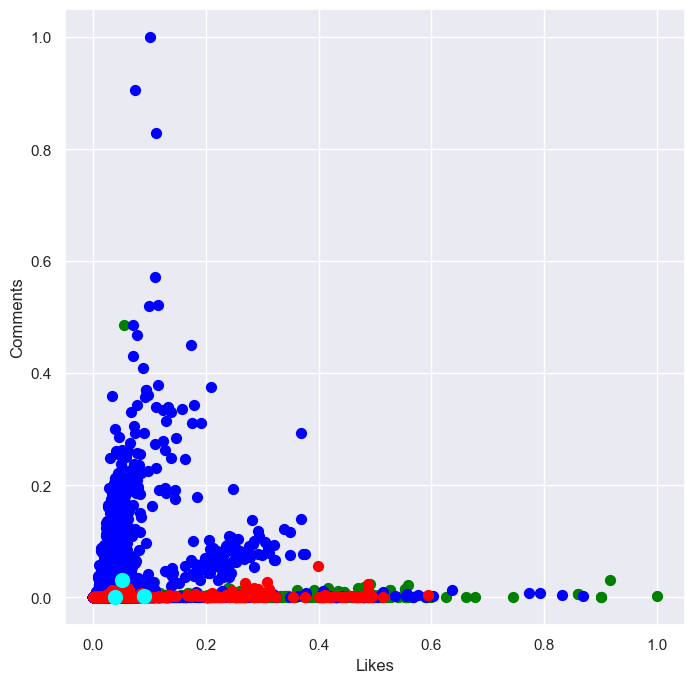

In [469]:
plt.figure(figsize=(8,8))
#plotting each cluster in separate colours
plt.scatter(X[Y==0].iloc[:,3], X[Y==0].iloc[:,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1].iloc[:,3], X[Y==1].iloc[:,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2].iloc[:,3], X[Y==2].iloc[:,1], s=50, c='red', label='Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:,3], kmeans3.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


Clearly, the 2D projections seem to suggest that the clustering has not been very meaningful. The data, or these specific projections of the data do not seem to have natural clusters.